In [96]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
pd.set_option("display.max_columns",500)

In [97]:
baseline_data = pd.read_csv('../data/baseline_main_data.csv')
date_info = pd.read_csv('../data/date_info.csv')

### Dev-test set

In [98]:
cls = []
for h, a, d in zip(baseline_data.HOME_WIN, baseline_data.AWAY_WIN, baseline_data.DRAW):
    if h == 1:
        cls.append(0)
    elif a == 1:
        cls.append(1)
    else:
        cls.append(2)

In [99]:
baseline_data['match_outcome'] = cls

In [100]:
def col_nunique(df): return {c: df[c].nunique() for c in df.columns} # get number of unique elements
def col_nas(df): return ({c:df[c].isnull().sum() for c in df.columns}) # get number of NAs

In [101]:
baseline_data.head(1)

,home_player_1_overall_rating,home_player_2_overall_rating,home_player_3_overall_rating,home_player_4_overall_rating,home_player_5_overall_rating,home_player_6_overall_rating,home_player_7_overall_rating,home_player_8_overall_rating,home_player_9_overall_rating,home_player_10_overall_rating,home_player_11_overall_rating,away_player_1_overall_rating,away_player_2_overall_rating,away_player_3_overall_rating,away_player_4_overall_rating,away_player_5_overall_rating,away_player_6_overall_rating,away_player_7_overall_rating,away_player_8_overall_rating,away_player_9_overall_rating,away_player_10_overall_rating,away_player_11_overall_rating,match_api_id,home_home_win_ratio,home_home_lose_ratio,home_home_draw_ratio,home_away_win_ratio,home_away_lose_ratio,home_away_draw_ratio,home_all_win_ratio,home_all_lose_ratio,home_all_draw_ratio,away_home_win_ratio,away_home_lose_ratio,away_home_draw_ratio,away_away_win_ratio,away_away_lose_ratio,away_away_draw_ratio,away_all_win_ratio,away_all_lose_ratio,away_all_draw_ratio,matching_home_home_win_ratio,matching_home_home_lose_ratio,matching_home_home_draw_ratio,matching_home_away_win_ratio,matching_home_away_lose_ratio,matching_home_away_draw_ratio,matching_home_all_win_ratio,matching_home_all_lose_ratio,matching_home_all_draw_ratio,AWAY_WIN,HOME_WIN,DRAW,TOTAL_GOALS,date,match_outcome
0,85.0,79.0,88.0,85.0,78.0,74.0,83.0,85.0,86.0,74.0,90.0,82.0,79.0,77.0,78.0,76.0,77.0,56.0,69.0,75.0,76.0,83.0,489042,0.6,0.2,0.2,0.2,0.0,0.8,0.4,0.1,0.5,0.25,0.75,0.0,0.0,0.333333,0.666667,0.1,0.5,0.4,0.666667,0.0,0.333333,0.5,0.5,0.0,0.6,0.2,0.2,0,0,1,2,2008-08-17 00:00:00,2


In [102]:
col_nas(baseline_data)

{'AWAY_WIN': 0,
 'DRAW': 0,
 'HOME_WIN': 0,
 'TOTAL_GOALS': 0,
 'away_all_draw_ratio': 0,
 'away_all_lose_ratio': 0,
 'away_all_win_ratio': 0,
 'away_away_draw_ratio': 0,
 'away_away_lose_ratio': 0,
 'away_away_win_ratio': 0,
 'away_home_draw_ratio': 0,
 'away_home_lose_ratio': 0,
 'away_home_win_ratio': 0,
 'away_player_10_overall_rating': 0,
 'away_player_11_overall_rating': 0,
 'away_player_1_overall_rating': 0,
 'away_player_2_overall_rating': 0,
 'away_player_3_overall_rating': 0,
 'away_player_4_overall_rating': 0,
 'away_player_5_overall_rating': 0,
 'away_player_6_overall_rating': 0,
 'away_player_7_overall_rating': 0,
 'away_player_8_overall_rating': 0,
 'away_player_9_overall_rating': 0,
 'date': 0,
 'home_all_draw_ratio': 0,
 'home_all_lose_ratio': 0,
 'home_all_win_ratio': 0,
 'home_away_draw_ratio': 0,
 'home_away_lose_ratio': 0,
 'home_away_win_ratio': 0,
 'home_home_draw_ratio': 0,
 'home_home_lose_ratio': 0,
 'home_home_win_ratio': 0,
 'home_player_10_overall_rating': 0

In [103]:
date_info.tail(22)

,date,days_to_next_match,dow,week
778,2016-04-02 00:00:00,1,5,13
779,2016-04-03 00:00:00,6,6,13
780,2016-04-09 00:00:00,1,5,14
781,2016-04-10 00:00:00,3,6,14
782,2016-04-13 00:00:00,3,2,15
783,2016-04-16 00:00:00,1,5,15
784,2016-04-17 00:00:00,1,6,15
785,2016-04-18 00:00:00,1,0,16
786,2016-04-19 00:00:00,1,1,16
787,2016-04-20 00:00:00,1,2,16


In [104]:
val_dt = pd.datetime(2016, 4, 2)
test_dt = pd.datetime(2016, 4, 23)

baseline_data.date = pd.to_datetime(baseline_data.date)

trn_data = baseline_data[baseline_data.date < val_dt]
val_data = baseline_data[(baseline_data.date >= val_dt) & (baseline_data.date < test_dt)]
test_data = baseline_data[baseline_data.date >= test_dt]

In [107]:
trn_data.shape, val_data.shape, test_data.shape

((2886, 56), (36, 56), (40, 56))

In [108]:
list(trn_data.columns)

['home_player_1_overall_rating',
 'home_player_2_overall_rating',
 'home_player_3_overall_rating',
 'home_player_4_overall_rating',
 'home_player_5_overall_rating',
 'home_player_6_overall_rating',
 'home_player_7_overall_rating',
 'home_player_8_overall_rating',
 'home_player_9_overall_rating',
 'home_player_10_overall_rating',
 'home_player_11_overall_rating',
 'away_player_1_overall_rating',
 'away_player_2_overall_rating',
 'away_player_3_overall_rating',
 'away_player_4_overall_rating',
 'away_player_5_overall_rating',
 'away_player_6_overall_rating',
 'away_player_7_overall_rating',
 'away_player_8_overall_rating',
 'away_player_9_overall_rating',
 'away_player_10_overall_rating',
 'away_player_11_overall_rating',
 'match_api_id',
 'home_home_win_ratio',
 'home_home_lose_ratio',
 'home_home_draw_ratio',
 'home_away_win_ratio',
 'home_away_lose_ratio',
 'home_away_draw_ratio',
 'home_all_win_ratio',
 'home_all_lose_ratio',
 'home_all_draw_ratio',
 'away_home_win_ratio',
 'away_hom

### Model

In [109]:
import numpy as np

In [110]:
np.array([sum(trn_data.HOME_WIN), sum(trn_data.DRAW), sum(trn_data.AWAY_WIN)]) / len(trn_data)

array([0.45495495, 0.25675676, 0.28828829])

In [111]:
# majority class model
# performance acc: 0.45 - first baseline

sum(val_data.HOME_WIN == 1) / len(val_data)

0.4444444444444444

### Random Forest

In [175]:
from sklearn.metrics import *
import rfpimp

In [113]:
drops = ['AWAY_WIN','HOME_WIN', 'DRAW', 'TOTAL_GOALS','date', 'match_api_id', 'match_outcome']

In [146]:
trn_X, trn_Y = trn_data.drop(drops, 1), trn_data.match_outcome
val_X, val_Y = val_data.drop(drops, 1), val_data.match_outcome

In [147]:
trn_X.shape, trn_Y.shape

((2886, 49), (2886,))

In [148]:
trn_X = trn_X.apply(lambda x: x.fillna(x.mean()))

In [112]:
rf = RandomForestClassifier(n_estimators=40, max_depth=10, min_samples_leaf=5, oob_score=True)
rf.fit(trn_X, trn_Y)
rf.oob_score_

In [164]:
# fillna by training means
val_nas = col_nas(val_X) 

In [165]:
for c in val_nas:
    if val_nas[c] > 0:
        val_X[c] = val_X[c].fillna(trn_X[c].mean())

In [168]:
val_preds = rf.predict(val_X)
sum(val_preds == val_Y) / len(val_Y)

### Seasonal Val

In [187]:
season_end = ['2009-05-24 00:00:00', '2010-05-09 00:00:00',
              '2011-05-22 00:00:00', '2012-05-13 00:00:00',
              '2013-05-19 00:00:00', '2014-05-11 00:00:00',
              '2015-05-24 00:00:00']
### Taking last 7 unique dates from each season/ year

unique_dates = pd.DataFrame(pd.DatetimeIndex(data = baseline_data.sort_values(by=['date']).date.unique()))
date_diff = unique_dates.diff(periods=1).fillna(0)
unique_dates2 = pd.concat([date_diff, unique_dates], axis=1)

unique_dates2.columns = ['daydiff', 'date']
unique_dates2['yr'] = unique_dates2.date.dt.year
validation_dates = list(unique_dates2.groupby(by='yr').tail(7)['date'])
validation_dates_str = [str(i) for i in validation_dates]

baseline_validation = baseline_data[baseline_data.date.isin(validation_dates_str)]

In [190]:
baseline_training = baseline_data[~baseline_data.index.isin(baseline_validation.index)]

In [193]:
baseline_training.shape, baseline_validation.shape, baseline_data.shape

((2709, 56), (253, 56), (2962, 56))

In [194]:
val_X, val_Y = baseline_validation.drop(drops, 1), baseline_validation.match_outcome
trn_X, trn_Y = baseline_training.drop(drops, 1), baseline_training.match_outcome

In [195]:
# fillna with means
trn_X = trn_X.apply(lambda x: x.fillna(x.mean()))

for c in val_nas:
    if val_nas[c] > 0:
        val_X[c] = val_X[c].fillna(trn_X[c].mean())

### Model

In [198]:
from sklearn.metrics import *
import rfpimp

In [253]:
rf = RandomForestClassifier(n_estimators=100, max_depth=7, min_samples_leaf=10, oob_score=True)
rf.fit(trn_X, trn_Y)
rf.oob_score_

0.5249169435215947

In [254]:
val_preds = rf.predict(val_X)
sum(val_preds == val_Y) / len(val_Y)

0.49407114624505927

In [256]:
imp = rfpimp.oob_importances(rf, trn_X, trn_Y)

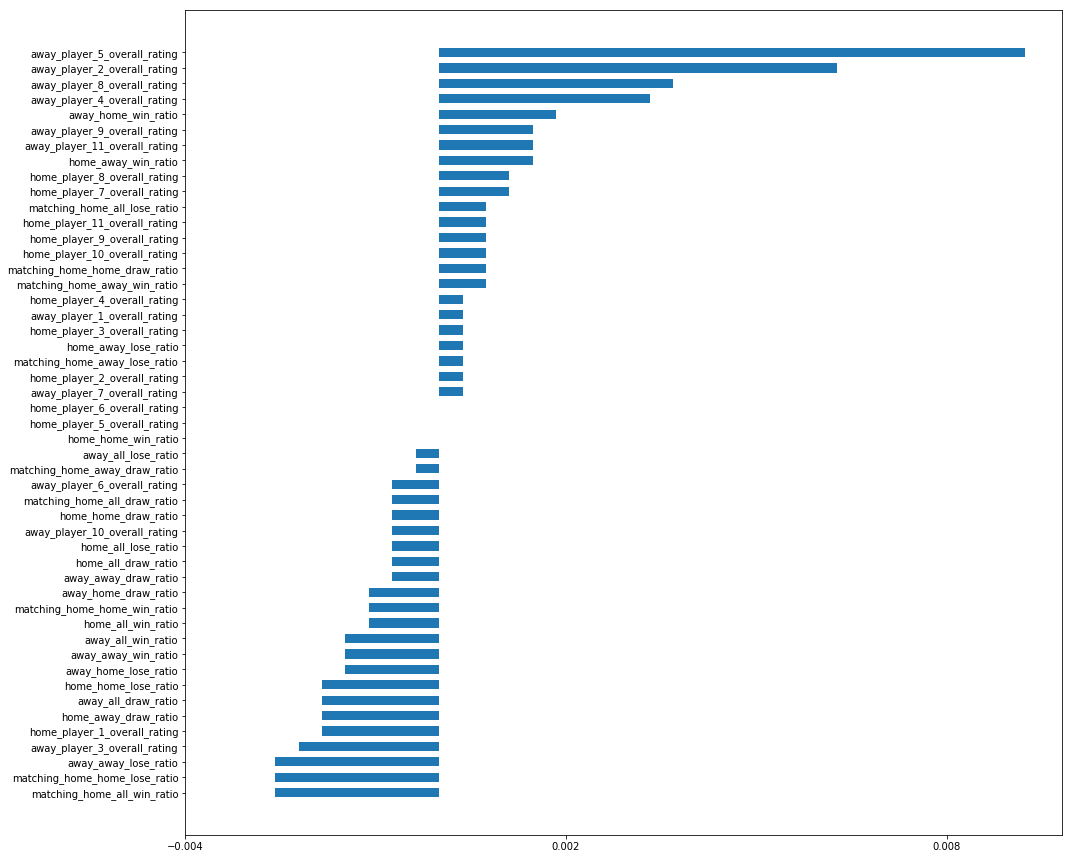

In [269]:
rfpimp.plot_importances(imp, figsize=(15,15))